In [3]:
from astropy.io import fits

In [4]:
eventfile=fits.open('sw01088940000bevshsp_uf.evt.gz')

In [5]:
events=eventfile[1].data

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
shortdat=events[(events['TIME']>660920900) & (events['TIME']<660921200)]

In [8]:
cleanevts = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

**Excercise: in words, describe the gamma-ray burst and relevant parameters, its structure and characteristics in time and energy. Try to think about how you might quantify some of these characteristics, like duration, spikiness, energy, etc, and if you can come up with a way of measuring them from the data.**

Text(0.5, 0, 'Time (s)')

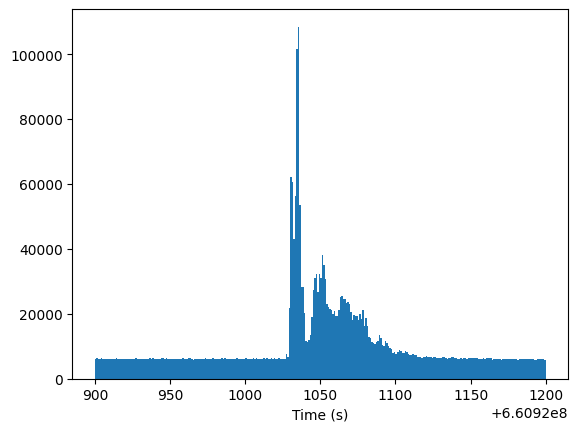

In [9]:
_=plt.hist(shortdat['TIME'], bins=300)
plt.xlabel('Time (s)')

In [8]:
filterdat = shortdat[(shortdat['EVENT_FLAGS']==0) & (shortdat['ENERGY']>15)]

In [9]:
import pandas as pd
time = []

df = pd.DataFrame(filterdat, columns = ['TIME','DET_ID','EVENT_FLAGS','PHA','MASK_WEIGHT','DETX','DETY','PI','ENERGY'])
df['TIME'] = df['TIME'].apply(lambda x: round(x))
time.extend(df['TIME'].tolist())

In [11]:
import numpy as np
photons = np.empty((0,1), int)
timearray = np.empty((0,1), int)
temp = 0

for i in range(time[0], time[-1]):
    timearray = np.append(timearray, np.array([[i]]))

for i in timearray:
    for j in range(len(time)):
        if time[j] == i:
            temp = temp + 1
    photons = np.append(photons, np.array([[temp]]))
    temp = 0

photons

array([  2322,   4681,   4663,   4760,   4738,   4741,   4716,   4523,
         4672,   4636,   4796,   4641,   4630,   4707,   4680,   4751,
         4653,   4640,   4587,   4672,   4620,   4603,   4671,   4715,
         4727,   4553,   4619,   4633,   4702,   4685,   4714,   4590,
         4722,   4575,   4700,   4621,   4749,   4828,   4637,   4657,
         4677,   4693,   4598,   4671,   4734,   4813,   4595,   4709,
         4723,   4535,   4609,   4628,   4581,   4611,   4577,   4589,
         4472,   4782,   4612,   4806,   4698,   4517,   4664,   4751,
         4686,   4642,   4537,   4591,   4630,   4711,   4643,   4623,
         4531,   4619,   4666,   4713,   4650,   4602,   4830,   4675,
         4734,   4588,   4633,   4707,   4763,   4635,   4653,   4850,
         4727,   4554,   4656,   4760,   4558,   4733,   4629,   4819,
         4672,   4606,   4731,   4687,   4776,   4639,   4617,   4657,
         4679,   4700,   4652,   4705,   4841,   4546,   4588,   4532,
      

In [2]:
timearray

NameError: name 'timearray' is not defined

Text(0, 0.5, '# of protons')

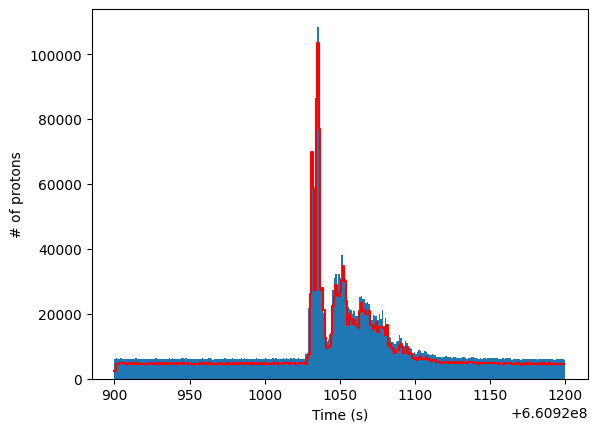

In [12]:
_=plt.hist(shortdat['TIME'], bins=300)
plt.plot(timearray, protons, 'r-', drawstyle='steps-post')
plt.xlabel('Time (s)')
plt.ylabel('# of protons')

In [13]:
sum = 0
count = 0
for i in range(len(protons) - 1):
    if protons[i+1] - protons[i] < 2000:
        sum = sum + protons[i]
        count = count + 1

avg = sum/count
avg

7893.528169014085

In [14]:
temparray = np.empty((0,2), int)

for i in range(len(protons)):
    if protons[i] > avg:
        temparray = np.append(temparray, np.array([timearray[i]]))
        
print(temparray[0])
print(temparray[-1])

660921030
660921094


In [15]:
shorterdat = filterdat[(filterdat['TIME']>temparray[0]) & (filterdat['TIME']<temparray[-1])]
shorterdat

FITS_rec([(6.60921030e+08,  3899, 0, 1870,  0.        ,  62,  92, 1819,  181),
          (6.60921030e+08, 22912, 0, 2422,  0.00095687, 126,  22,  572,   57),
          (6.60921030e+08, 24027, 0, 2420, -0.00020341, 119,  26, 1568,  156),
          ...,
          (6.60921094e+08,   571, 0, 2579, -0.00011254,   8, 114,  251,   25),
          (6.60921094e+08,  1170, 0, 2398,  0.00022561,  31, 170,  566,   56),
          (6.60921094e+08, 15704, 0, 2496,  0.00022561, 274, 132,  476,   47)],
         dtype=(numpy.record, [('TIME', '>f8'), ('DET_ID', '>i2'), ('EVENT_FLAGS', 'u1'), ('PHA', '>i2'), ('MASK_WEIGHT', '>f4'), ('DETX', '>i2'), ('DETY', '>i2'), ('PI', '>i2'), ('ENERGY', '>i2')]))

Text(0, 0.5, '# of protons')

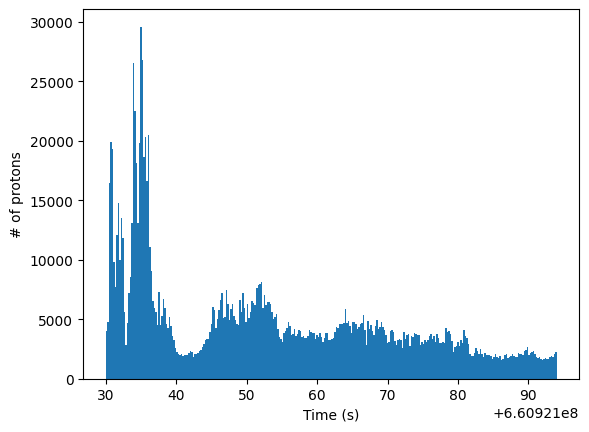

In [16]:
_=plt.hist(shorterdat['TIME'], bins=300)
plt.xlabel('Time (s)')
plt.ylabel('# of protons')